In [21]:
from PIL import Image
import requests
import torch
from transformers import SamModel, SamProcessor
import torch.nn.functional as tF

model = SamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]] # 2D localization of a window

In [22]:
inputs = processor(raw_image, return_tensors="pt")
inputs = {k: v.to(torch.float32) for k, v in inputs.items()}

In [25]:
inputs['pixel_values'].shape

torch.Size([1, 3, 1024, 1024])

In [15]:
outputs = model(**inputs)
scores = outputs.iou_scores

In [16]:
scores

tensor([[[0.8598, 0.7274, 0.4515]]], grad_fn=<SliceBackward0>)

In [27]:
from transformers import pipeline
generator =  pipeline("mask-generation", points_per_batch = 256)
image_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
outputs = generator(image_url, points_per_batch = 256)

No model was supplied, defaulted to facebook/sam-vit-huge and revision 997b15 (https://huggingface.co/facebook/sam-vit-huge).
Using a pipeline without specifying a model name and revision in production is not recommended.


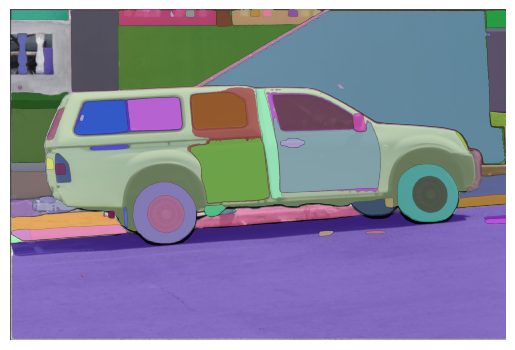

In [28]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    

plt.imshow(np.array(raw_image))
ax = plt.gca()
for mask in outputs["masks"]:
    show_mask(mask, ax=ax, random_color=True)
plt.axis("off")
plt.show()